## Training SVM classifier on DD_ACC dataset

The first step is to read dataset from CSV file

In [14]:
import pandas as pd
from sklearn import preprocessing


#dd_dataset = pd.read_csv('./dataset/dd_pssm_dataset_improved.csv')
# Add separated dimers feature extraction

dd_dataset = pd.read_csv('../dataset/RDD/rdd_fusion_acc_dimer_FULL.csv')

In [15]:
dd_dataset.head()

,Fold,Protein name,F1,F2,F3,F4,F5,F6,F7,F8,...,F1991,F1992,F1993,F1994,F1995,F1996,F1997,F1998,F1999,F2000
0,Globin-like,3SDHA,0.875325,-9.067278e-03,-0.157973,-0.037824,-0.096289,-0.600570,-0.038737,-0.059022,...,3075.109023,2871.204345,3219.274065,3056.100567,3101.131513,2974.661233,3040.830717,2650.093115,3223.486219,3172.282238
1,Globin-like,2MGE,-0.882343,4.514141e-28,-0.249065,-0.827283,-0.301414,-0.209287,-0.049740,0.258464,...,4362.316156,4313.697029,4251.050649,4235.633188,4226.389058,4170.756304,4214.447479,3952.237108,4165.023421,4257.360219
2,Globin-like,2LHB,0.793873,-3.081755e-02,0.064096,-0.278083,0.512932,-0.041347,0.165949,1.575439,...,2112.385669,2063.294601,2061.929604,1917.702814,2127.745072,1567.890326,1894.384633,1827.666616,2274.833084,2168.754399
3,Globin-like,2HBG,0.494363,-2.093698e-03,-0.143159,-0.102345,-0.048332,-0.504646,0.173782,-0.166912,...,787.263838,822.509253,822.743843,802.848198,838.074582,677.062166,830.082758,685.053990,838.074582,809.509371
4,Globin-like,2GDM,0.244576,1.036405e-28,0.098618,0.247916,0.186200,-0.115422,-0.049198,0.343130,...,1092.390232,952.415565,1014.695414,1036.893139,1092.390232,908.100742,935.830147,800.441628,1056.316843,1072.966527


Convert class lables to unique integers

In [16]:
# Encode class labels
#from sklearn.preprocessing import LabelEncoder

y_true, labels = pd.factorize(dd_dataset.Fold)
dd_dataset.insert(1, 'class labels', y_true)

In [17]:
dd_dataset.head()

,Fold,class labels,Protein name,F1,F2,F3,F4,F5,F6,F7,...,F1991,F1992,F1993,F1994,F1995,F1996,F1997,F1998,F1999,F2000
0,Globin-like,0,3SDHA,0.875325,-9.067278e-03,-0.157973,-0.037824,-0.096289,-0.600570,-0.038737,...,3075.109023,2871.204345,3219.274065,3056.100567,3101.131513,2974.661233,3040.830717,2650.093115,3223.486219,3172.282238
1,Globin-like,0,2MGE,-0.882343,4.514141e-28,-0.249065,-0.827283,-0.301414,-0.209287,-0.049740,...,4362.316156,4313.697029,4251.050649,4235.633188,4226.389058,4170.756304,4214.447479,3952.237108,4165.023421,4257.360219
2,Globin-like,0,2LHB,0.793873,-3.081755e-02,0.064096,-0.278083,0.512932,-0.041347,0.165949,...,2112.385669,2063.294601,2061.929604,1917.702814,2127.745072,1567.890326,1894.384633,1827.666616,2274.833084,2168.754399
3,Globin-like,0,2HBG,0.494363,-2.093698e-03,-0.143159,-0.102345,-0.048332,-0.504646,0.173782,...,787.263838,822.509253,822.743843,802.848198,838.074582,677.062166,830.082758,685.053990,838.074582,809.509371
4,Globin-like,0,2GDM,0.244576,1.036405e-28,0.098618,0.247916,0.186200,-0.115422,-0.049198,...,1092.390232,952.415565,1014.695414,1036.893139,1092.390232,908.100742,935.830147,800.441628,1056.316843,1072.966527


Create a training set from pandas data frame

In [18]:
train_data = dd_dataset.iloc[:,3:].values

# Normalize dataset
min_max_scaler = preprocessing.MinMaxScaler()
train_scaled = min_max_scaler.fit_transform(train_data)
train_data = train_scaled

print("Number of samples: %d, Number of features: %d" % (train_data.shape[0], train_data.shape[1]))

Number of samples: 311, Number of features: 2000


In [19]:
# Show normlaized data

train = pd.DataFrame(train_data)

train.head()

,0,1,2,3,4,5,6,7,8,9,...,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
0,0.638146,0.798008,0.290521,0.350786,0.450703,0.336817,0.268868,0.462568,0.678321,0.197787,...,0.199057,0.214074,0.233588,0.208871,0.207091,0.201086,0.226979,0.186932,0.208875,0.214551
1,0.237390,0.800823,0.266661,0.251847,0.338860,0.430979,0.264445,0.537161,0.556169,0.092102,...,0.282380,0.321624,0.308453,0.289487,0.282235,0.281941,0.314582,0.278782,0.269884,0.287938
2,0.619575,0.791257,0.348690,0.320676,0.782876,0.471393,0.351156,0.846582,0.512293,0.404133,...,0.136738,0.153837,0.149612,0.131067,0.142089,0.105989,0.141404,0.128920,0.147404,0.146679
3,0.551286,0.800173,0.294402,0.342700,0.476851,0.359901,0.354305,0.437219,0.446061,0.401031,...,0.050961,0.061325,0.059698,0.054871,0.055966,0.045769,0.061960,0.048322,0.054305,0.054750
4,0.494333,0.800823,0.357733,0.386597,0.604728,0.453567,0.264663,0.557053,0.432220,0.293011,...,0.070712,0.071011,0.073626,0.070867,0.072949,0.061387,0.069854,0.056461,0.068447,0.072568


## Data analysis

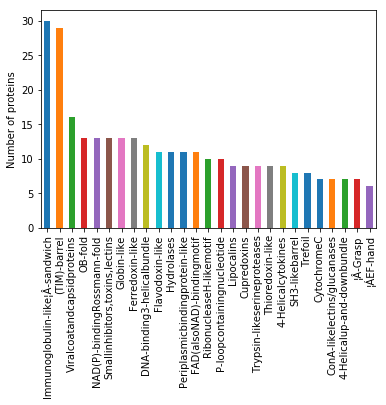

In [20]:
# Frequency of folds
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
freq_plot = dd_dataset['Fold'].value_counts().plot(ax=ax, kind='bar')
freq_plot.set_ylabel('Number of proteins')
plt.show()

## SVM classifier

In [21]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Hyperparameters
kernel = 'rbf'

# An instance of SVM classifier
svm_cl = SVC(kernel=kernel)

Define range of parameters for Grid Search

In [22]:
# Penalty parameter
c_range = {'C': [float(2**i) for i in range(-14, 14)]}
# Gamma parameter for RBF kernel
gamma_range = {'gamma': [float(2**i) for i in range(-14, 14)]} if kernel == 'rbf' else {}

param_range = {**c_range, **gamma_range}

# Arguments for grid search
cv_fold = 10
n_workers = -1 # Number of CPU threads

result = GridSearchCV(svm_cl, param_range, cv=cv_fold, n_jobs=n_workers, refit=True,
                      verbose=1)

Start grid search!

In [23]:
result.fit(train_data, y_true)

Fitting 10 folds for each of 784 candidates, totalling 7840 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 6 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   11.6s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   34.8s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed:  8.8min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed: 11.3min
[Parallel(n_jobs=-1)]: Done 4992 tasks      | elapsed: 14.1min
[Parallel(n_jobs=-1)]: Done 6042 tasks      | elapsed: 17.1min
[Parallel(n_jobs=-1)]: Done 7192

GridSearchCV(cv=10, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': [6.103515625e-05, 0.0001220703125, 0.000244140625, 0.00048828125, 0.0009765625, 0.001953125, 0.00390625, 0.0078125, 0.015625, 0.03125, 0.0625, 0.125, 0.25, 0.5, 1.0, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 128.0, 256.0, 512.0, 1024.0, 2048.0, 4096.0, 8192.0], 'gamma': [6.103515625e-05, 0.0...25, 0.5, 1.0, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 128.0, 256.0, 512.0, 1024.0, 2048.0, 4096.0, 8192.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [11]:
print("Best accuracy: %.2f" % (result.best_score_ * 100))

Best accuracy: 21.54


Confusion matrix

Accuracy:  83.60128617363344


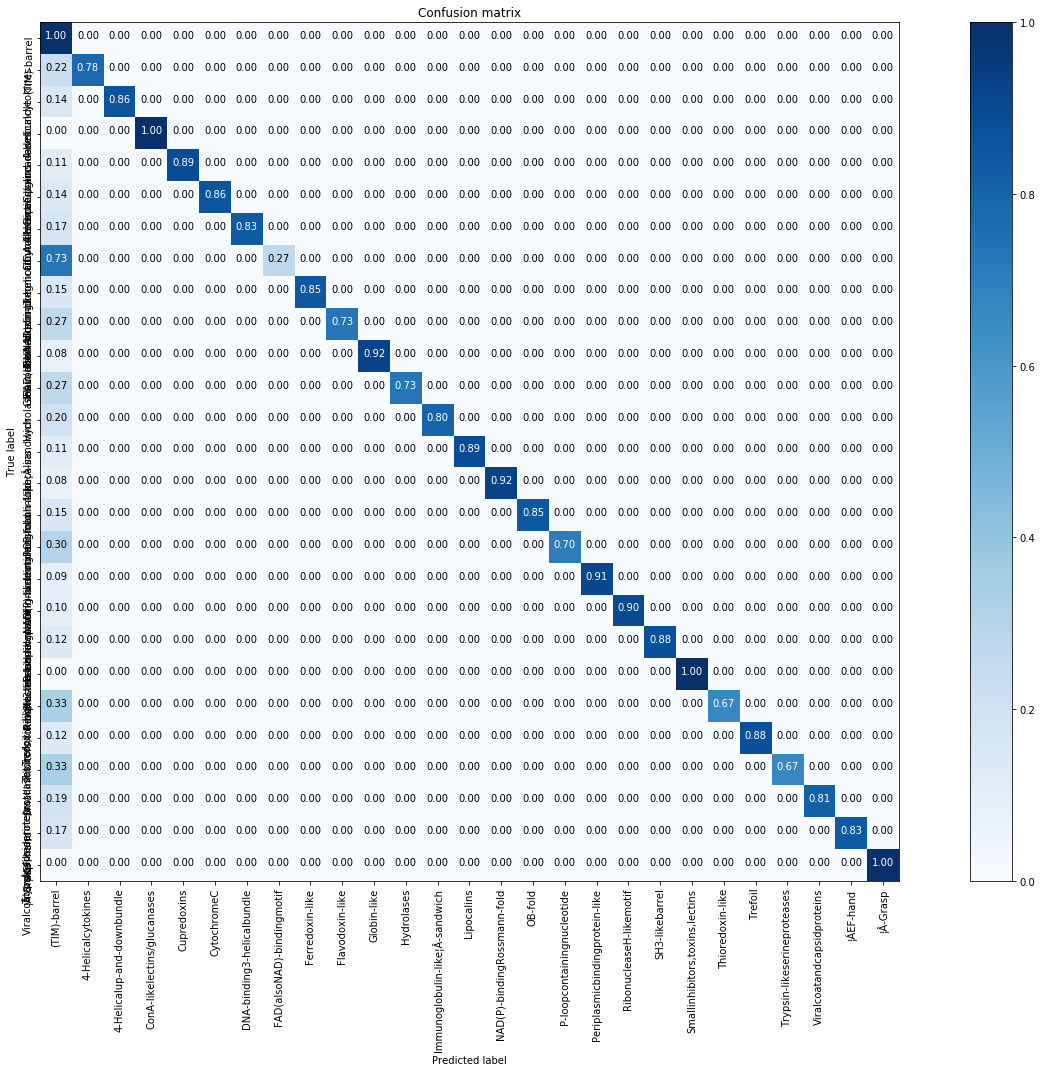

In [12]:
import sys
sys.path.insert(0, '../')


from misc import plt_confusion_matrix
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import numpy as np

y_pred = result.best_estimator_.predict(train_data)

cm = confusion_matrix(labels[y_true], labels[y_pred])

print("Accuracy: ", (accuracy_score(labels[y_true], labels[y_pred]) * 100))

plt.figure(figsize=(20, 15))
plt_confusion_matrix(cm, np.unique(labels[y_true]))
plt.savefig("../report/DD_IG_ACC_confusion_matrix.png", dpi=256)

Classification report

In [13]:
print(classification_report(labels[y_true], labels[y_pred]))

                                precision    recall  f1-score   support

                  (TIM)-barrel       0.36      1.00      0.53        29
            4-Helicalcytokines       1.00      0.78      0.88         9
    4-Helicalup-and-downbundle       1.00      0.86      0.92         7
   ConA-likelectins/glucanases       1.00      1.00      1.00         7
                   Cupredoxins       1.00      0.89      0.94         9
                   CytochromeC       1.00      0.86      0.92         7
    DNA-binding3-helicalbundle       1.00      0.83      0.91        12
     FAD(alsoNAD)-bindingmotif       1.00      0.27      0.43        11
               Ferredoxin-like       1.00      0.85      0.92        13
               Flavodoxin-like       1.00      0.73      0.84        11
                   Globin-like       1.00      0.92      0.96        13
                    Hydrolases       1.00      0.73      0.84        11
Immunoglobulin-like¦Â-sandwich       1.00      0.80      0.89  

# XG Boost

In [14]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

# Create Dmatrix for more performance 
data_matrix = xgb.DMatrix(data=float(train_data),label=float(labels)

# Split data to train and test
X_train, X_test, y_train, y_test = train_test_split(float(train_data), float(labels), test_size=0.2, random_state=123)

SyntaxError: invalid syntax (<ipython-input-14-a31eead7f1eb>, line 10)

In [ ]:
# Instantitate an XGBosst Classifier
xg_clf = xgb.XGBClassifier(objective ='binary:logistic', colsample_bytree = 0.1, learning_rate = 0.1,
                max_depth = 10, alpha = 10, n_estimators = 10)


In [ ]:
# Fit the classifier to the training set
xg_clf.fit(X_train,y_train)

# Predit test data
preds = xg_clf.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, preds)

In [ ]:
print("Best accuracy: %.2f" % (accuracy*100))
